# Finding The Best Markets to Advertise In
This project is practice for being able to statistically summarize data and get useful business insights to be used in informed decision-making

Case: An E-Learning company that specializes in Web and Mobile development wants us to help them determine the two best markets to advertise in. A way that we can identify lucrative markets is to somehow get a sense of what people are interested in, where these potential customers are located and how much people are willing to spend

To avoid spening resources on a our own survey, we will make use of an existing information collected by the E-Learning platform freeCodeCamp in a 2017 survey. freeCodeCamp have made this dataset available [here](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
%matplotlib inline

## Explore the data

In [2]:
#read in df
url = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
df = pd.read_csv(url, error_bad_lines=False)
df = pd.read_csv(url, low_memory=False, error_bad_lines=False)

/Users/nicorabang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#glimpse df
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#check dim
df.shape

(18175, 136)

In [5]:
#check cols
df.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

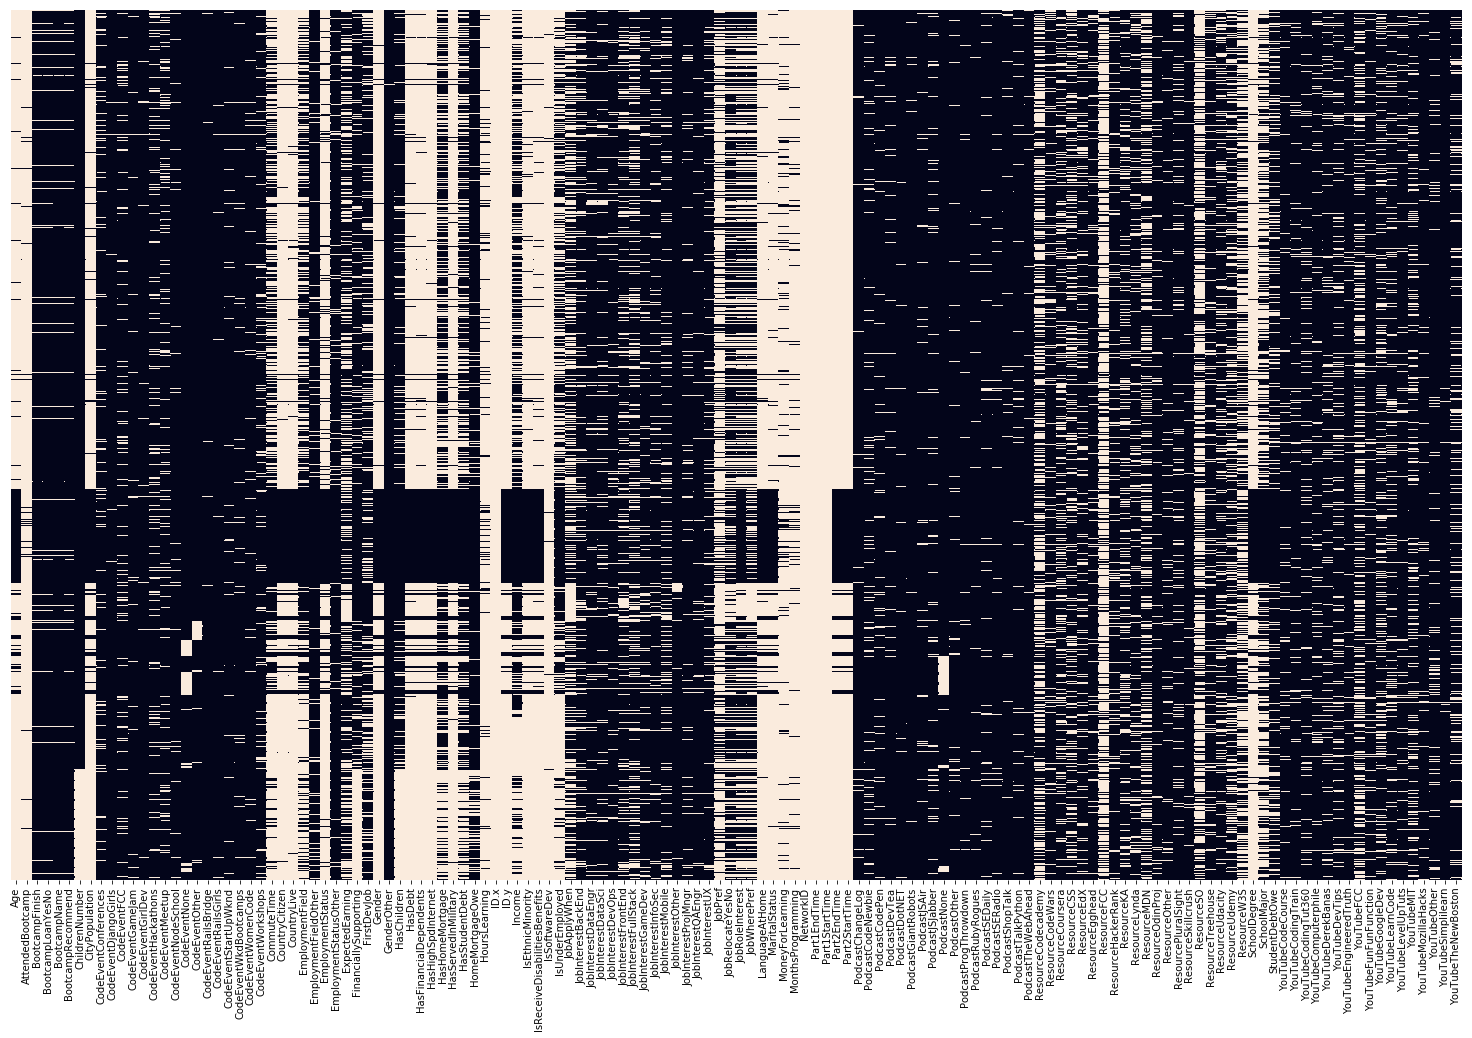

In [6]:
#function for null matrix viz
def plot_null_matrix(df, figsize=(26,16)):
    plt.figure(figsize=figsize)
    df_null = df.isnull()
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.show()
plot_null_matrix(df)

We can see in the visualization above that there are a lot of null values in the dataset

## Identify relevant fields for analysis
We want to focus on the columns that pertain to:
* subject interests
* willingness to invest in education (budget)
* current geographic location
* preferred spoken language
    
Looking at the [GitHub Page](https://github.com/freeCodeCamp/2017-new-coder-survey) where this dataset comes from, we are able to identify some columns that might be relevant to our analysis:

* Age
* CountryCitizen
* CountryLive
* EmploymentField
* EmploymentStatus
* HoursLearning
* JobRoleInterest
* LanguageAtHome
* MoneyForLearning
* MonthsProgramming


First, we want to determine if the people in this dataset contain our target market in the first place. There will be no sense in determining which markets to advertise in if this people are not interested in our offerings anyway. By looking at the 'JobRoleInterest' column, we are able to see their subject interests so that we might know if the people are interested in our company's offerings

In [14]:
df['JobRoleInterest'].value_counts(normalize=True, dropna=False, ascending=False) * 100

NaN                                                                                                                                                                                            61.529574
Full-Stack Web Developer                                                                                                                                                                        4.528198
  Front-End Web Developer                                                                                                                                                                       2.475928
  Data Scientist                                                                                                                                                                                0.836314
Back-End Web Developer                                                                                                                                                                          0.78

We see that there are a lot of nulls and that the other values contain more than one job role. Also, the larger percentages indicate that there are a quite a lot of people interested in web development, data science, mobile development and others. To be able to see patterns more clearly, we have to unravel the entries with multiple job roles and count them up individually. Before we do that, let us remove all the null values first since these will have no use for our analysis.  

In [15]:
num_resp = df['JobRoleInterest'].notnull().sum()
perc_resp = num_resp/df.shape[0]
null_resp = df['JobRoleInterest'].isnull().sum()
perc_null = null_resp/df.shape[0]
print('Total responses for Job Role Interest: {} ({:.2%})'.format(num_resp, perc_resp))
print('Nulls for Job Role Interest: {} ({:.2%})'.format(null_resp, perc_null))

Total responses for Job Role Interest: 6992 (38.47%)
Nulls for Job Role Interest: 11183 (61.53%)


Only 38.74% have a response for this crucial question. We will create a subset of the JobRoleInterest column that are all non-null

In [16]:
jri_df = df.dropna(subset=['JobRoleInterest'])

In [24]:
#remaining observations after removal of nulls
jri_df.shape

(6992, 137)

In [25]:
#split up each value into lists of individual job roles
jri_df['JRI'] = jri_df['JobRoleInterest'].str.split(',')

/Users/nicorabang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
jri_df[['Age', 'JRI']]

,Age,JRI
1,34.0,[Full-Stack Web Developer]
2,21.0,"[ Front-End Web Developer, Back-End Web Deve..."
3,26.0,"[ Front-End Web Developer, Full-Stack Web De..."
4,20.0,"[Full-Stack Web Developer, Information Securi..."
6,29.0,[Full-Stack Web Developer]
9,24.0,"[Full-Stack Web Developer, Quality Assuranc..."
11,22.0,"[ DevOps / SysAdmin, Data Scientist, Info..."
13,44.0,"[Back-End Web Developer, Full-Stack Web Devel..."
14,27.0,[Full-Stack Web Developer]
15,32.0,[Full-Stack Web Developer]


In [27]:
#remove punctuation and convert to lower case
def stripnorm(lst):
    return [x.replace('-', ' ').replace('  ', ' ').strip().lower() for x in lst]

jri_df['JRI'] = jri_df['JRI'].apply(stripnorm)

/Users/nicorabang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
#create column of job role count per person
jri_df['n_interests'] = jri_df['JRI'].apply(len)
jri_df[['JRI', 'n_interests']].head()

/Users/nicorabang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,JRI,n_interests
1,[full stack web developer],1
2,"[front end web developer, back end web develop...",5
3,"[front end web developer, full stack web devel...",3
4,"[full stack web developer, information securit...",5
6,[full stack web developer],1


In [29]:
#list down percentages of number of job roles per person
jricounts = jri_df['n_interests'].value_counts(normalize=True) * 100
jricounts

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: n_interests, dtype: float64

In [30]:
#count up values and store them in a dictionary
JRI_dict = {}
for lst in jri_df['JRI']:
    for each in lst:
        if each in JRI_dict:
            JRI_dict[each] += 1
        else:
            JRI_dict[each] = 1

jricnts = pd.DataFrame(list(JRI_dict.items()))
jricnts.columns = ['role', 'counts']
jricnts['perc'] = round((jricnts['counts']/ jricnts['counts'].sum()) * 100, 2)
jricnts = jricnts.sort_values(by='counts', ascending=False)
jricnts.head()

,role,counts,perc
0,full stack web developer,4198,18.58
1,front end web developer,3533,15.63
2,back end web developer,2772,12.27
4,mobile developer,2305,10.20
9,data scientist,1643,7.27


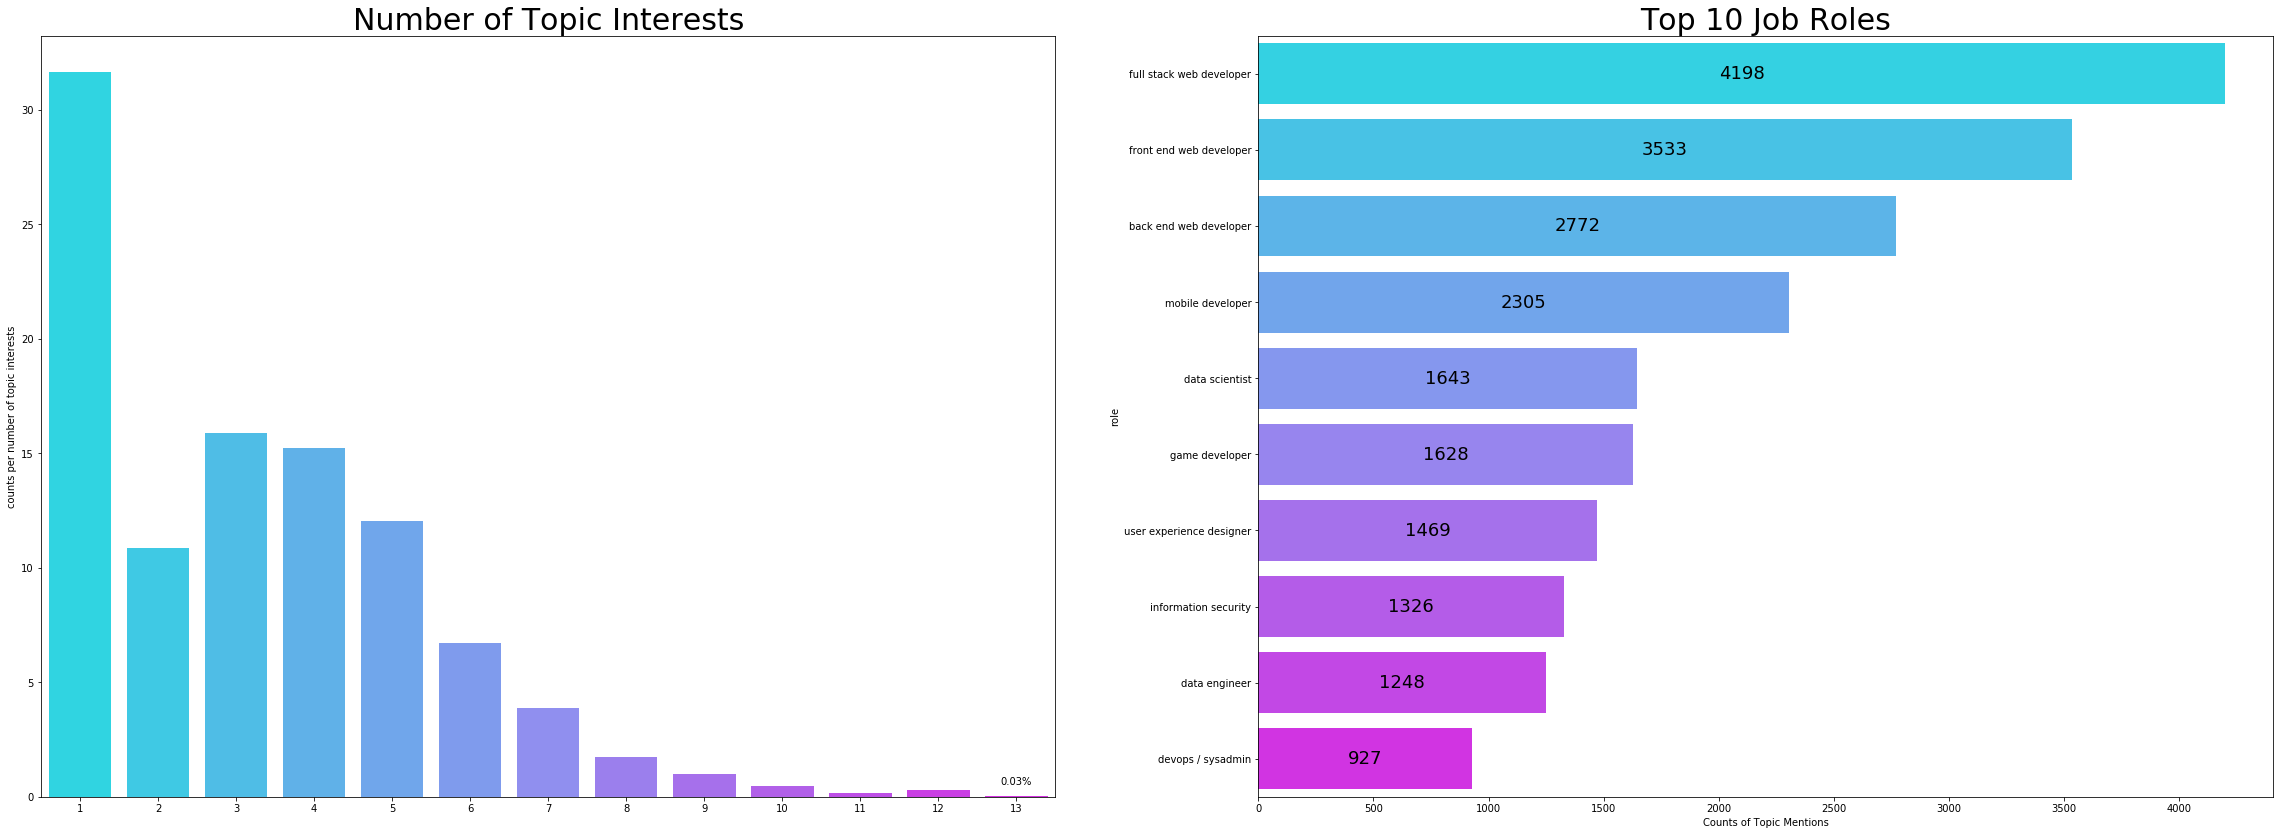

In [31]:
#visualize job role counts and top 10 job roles
fig, ax = plt.subplots(1,2,figsize=(40,14))
g = sns.barplot(x = jricounts.index, y = jricounts, palette ="cool",
                ax=ax[0])
ax[0].set_title('Number of Topic Interests', fontsize=30)
ax[0].set_ylabel('counts per number of topic interests')
total = float(len(jri_df))
for p in ax[0].patches:
    height = p.get_height()
ax[0].text(x=p.get_x()+p.get_width()/2,
           y=height + 0.5,
           s='{:1.2f}%'.format(height),
           ha="center")

g2 = sns.barplot(x = 'counts', 
                 y = 'role', palette ="cool",
                 data=jricnts.head(10),
                 ax=ax[1], orient='h')

ax[1].set_title('Top 10 Job Roles', fontsize=30)
ax[1].set_xlabel('Counts of Topic Mentions')
for p in ax[1].patches:
    width, height = p.get_width(), p.get_height()
    ax[1].text(x= width*0.5, y=p.get_y()+0.5 * height, s=int(width), ha='center',
               va='center', fontsize=18)

Most people indicated 1-5 topics. The biggest share around the number of interests is 1 job role/topic at around 30%. This means there are quite a few people who have multiple interests.

Meanwhile, the top 10 job role/topic interests seem to fall under our companies offerings. The top 4 positions belong to some form of web developer or mobile developer, with data scientist taking the top 5th position. 

Since our company offers mostly Web or Mobile Development courses, we want to know how much of the people in our sample are interested in them. Knowing this will answer the question of sample representativeness: if there are enough people who are interested in our offerings for us to carry on with identifying markets for us to advertise in. Let's analyze how much of our sample have indicated some form of web or mobile development. For this, we will tag all rows that mention 'Web' or 'Mobile' and then compare percentages with those observations that do not mention those terms at all. 

In [32]:
jri_df['webmod'] = jri_df['JobRoleInterest'].str.contains('Web Developer|Mobile Developer', regex=True)
jri_df['webmod'] = jri_df['webmod'].map({True:'webmod', False:'other'})
jri_df[['JobRoleInterest', 'JRI', 'webmod']].head()

/Users/nicorabang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nicorabang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,JobRoleInterest,JRI,webmod
1,Full-Stack Web Developer,[full stack web developer],webmod
2,"Front-End Web Developer, Back-End Web Develo...","[front end web developer, back end web develop...",webmod
3,"Front-End Web Developer, Full-Stack Web Deve...","[front end web developer, full stack web devel...",webmod
4,"Full-Stack Web Developer, Information Security...","[full stack web developer, information securit...",webmod
6,Full-Stack Web Developer,[full stack web developer],webmod


In [33]:
webmod_counts = jri_df['webmod'].value_counts(normalize=True)*100
webmod_counts

webmod    86.241419
other     13.758581
Name: webmod, dtype: float64

In [34]:
jri_df['webmod'].value_counts()

webmod    6030
other      962
Name: webmod, dtype: int64

Text(0.5, 0, '')

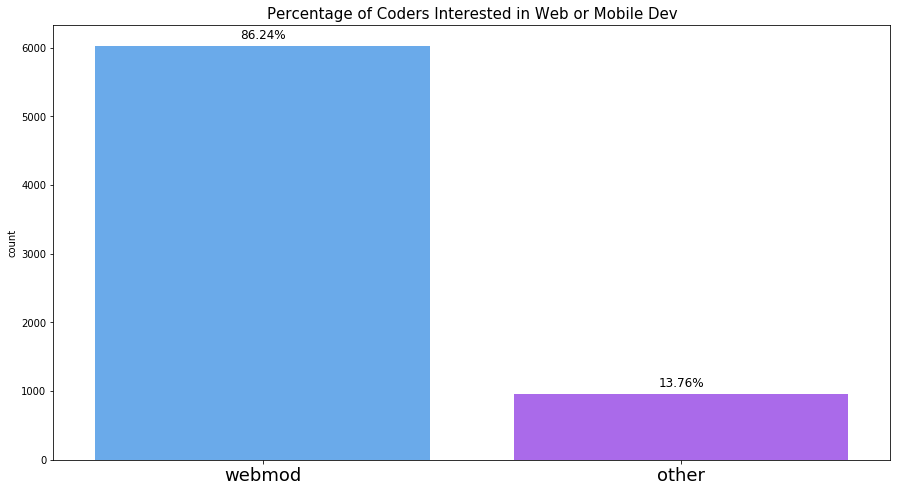

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='webmod', data=jri_df, palette='cool')
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+p.get_width()/2,
    y=height + 100,
    s='{:.2f}%'.format(height/int(len(jri_df))*100),
    ha="center", fontsize='large')
ax.set_title('Percentage of Coders Interested in Web or Mobile Dev', fontsize=15)
ax.tick_params(axis="x", labelsize=18)
ax.set_xlabel('')

Looking at the barchart confirms that our sample is representative of the population of new coders that our company is looking for (those who are interested in web or mobile development) 

## Analysis of locations of new coders
Now we want to know where these new coders who might interested in our offerings are located. The 'CountryLive' column indicates where a given new coder is residing. We can then consider each location a potential market for us to tap. We should remember that how good a market is (partly) determined by how many potential customers that it has. The more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [38]:
abs_freqs = jri_df['CountryLive'].value_counts()
rel_freqs = jri_df['CountryLive'].value_counts(normalize=True) * 100
mkt_counts = pd.DataFrame(data={'n_coders': abs_freqs, 'percentage': rel_freqs})

In [39]:
mkt_counts_top = mkt_counts.head(4)
mkt_counts_top

,n_coders,percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281


The table above shows that there is a sizeable market for us in the US, India, UK and Canada. The US has vastly more new coders relative to the other 3, however. Let us visualize this below

Text(0, 0.5, 'Number of New Coders')

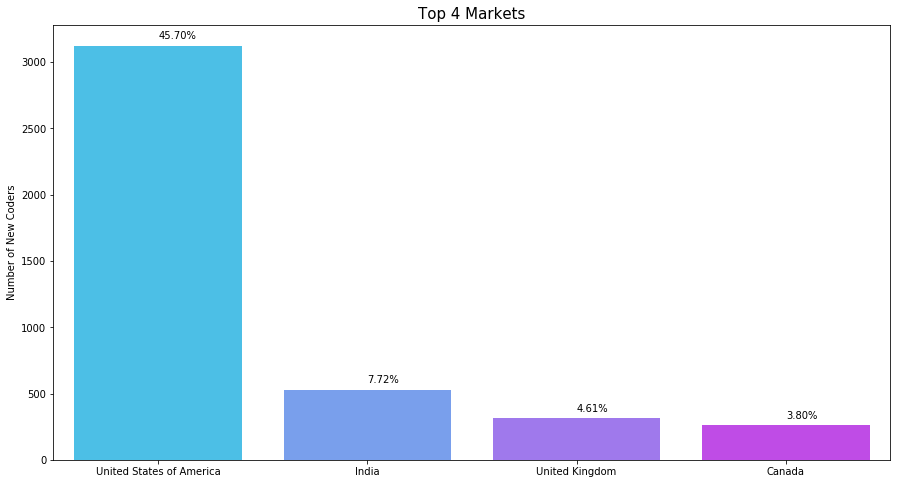

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=mkt_counts_top.index, y='n_coders', data=mkt_counts_top, palette='cool')
for p in ax.patches:
    height = p.get_height()
    total = mkt_counts['n_coders'].sum()
    ax.text(x=p.get_x()+p.get_width()/2,
            y=height + 50, s='{:.2f}%'.format((height/total)*100, 
            ha="center"))
ax.set_title('Top 4 Markets', fontsize=15)
ax.set_ylabel('Number of New Coders')



## Willingness to pay
There are a lot of willing learners in the top 4 countries, but we must also look into how much these willing learners  are willing to spend as well

The 'MoneyForLearning' column describes in US dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions to our courses for \$59 per month so we must see if they would be willing to be paying that much for our services of if our price is out of reach for them

We will narrow our analysis to the top 4 countries. An added bonus for this is that these countries happen to have English as an official language, which would help us when we make our advertisements for these markets

We will now create a new column that describes the amount of money a student has spent per month. We will divide the 'MoneyForLearning' by the 'MonthsProgramming' column. Some respondents who may have just started have indicated that they ahve been learning for 0 months, which is an issue since we cannot divide by zero. Thus, we will convert all 0 responses to 1. This is sensible because the difference between a 0 month learner and a 1 months learner is not that large

In [42]:
#retain only top 4 countries
jri_df4 = jri_df[jri_df['CountryLive'].isin(['United States of America',
                                             'India', 'United Kingdom', 'Canada'])]

In [43]:
jri_df4.shape

(4228, 139)

In [44]:
#replace all 'MonthsProgramming' zero values with 1
jri_df4['MonthsProgramming'] = jri_df4['MonthsProgramming'].replace(0.0,1.0)

/Users/nicorabang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
jri_df4['mth_budg'] = jri_df4['MoneyForLearning']/jri_df4['MonthsProgramming']

/Users/nicorabang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
#check for nulls
nulls = jri_df4['mth_budg'].isnull().sum()
nullsperc = nulls / jri_df4.shape[0] * 100
print('nulls: {} ({:.2}%)'.format(nulls, nullsperc))

nulls: 313 (7.4%)


Null values make up 7.4% of our values for monthly budget. This is still an acceptable amount to drop for the analysis

In [47]:
#drop nulls for monthly budget
budg_df = jri_df4.dropna(subset=['mth_budg'])

In [48]:
budg_df.groupby('CountryLive', as_index=False).agg({'mth_budg':'mean'}).sort_values(by='mth_budg', ascending=False)

,CountryLive,mth_budg
3,United States of America,227.997996
1,India,135.100982
0,Canada,113.510961
2,United Kingdom,45.534443


Surprisingly, India has a higher mean for monthly budget than both Canada and the UK. There are several possibilities for why this is so. First is that we might not have represenatative data for Canada and the UK. Alternatively, it could be that we have some outliers making the mean too large for India, or too low for the UK and Canada as a result of wrong encoding of data. However, it might be that our data is correct

Let us investigate the possiblity of outliers in the data. For this use the Inter-Quartile Deviation (IQD) method.
Using boxplots will allow us to more easily identify these possible outliers.


Text(0.5, 0, 'Country')

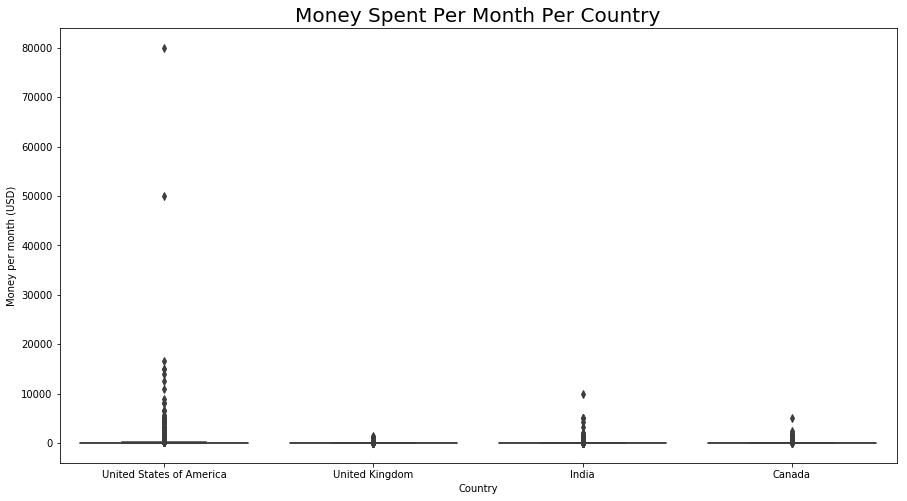

In [49]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(y = 'mth_budg', x = 'CountryLive', data = budg_df)
ax.set_title('Money Spent Per Month Per Country', fontsize = 20)
ax.set_ylabel('Money per month (USD)')
ax.set_xlabel('Country')

It's hard to see on the plot above if there's are irregularities with the data from UK, India and Canada. The data for the US does show two observations that stand out. It seems that two people are spending \$50k per month. This is unreasonably high so we'll set a threshold for monthly budget at a more reasonable amount of \$20000 

In [50]:
budg_df = budg_df[budg_df['mth_budg']<=20000]

Text(0.5, 0, 'Country')

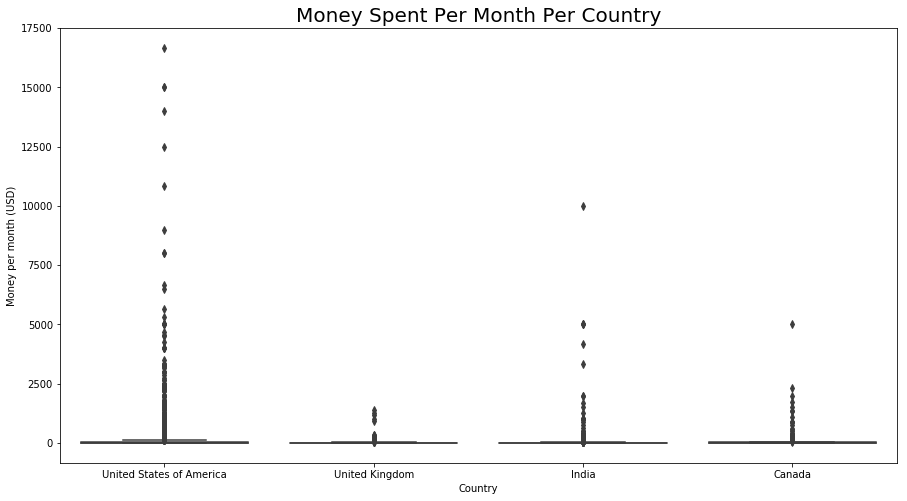

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(y = 'mth_budg', x = 'CountryLive', data = budg_df)
ax.set_title('Money Spent Per Month Per Country', fontsize = 20)
ax.set_ylabel('Money per month (USD)')
ax.set_xlabel('Country')

Our basis for detecting 'extreme outliers' from here on out is a visual one. We will define 'extreme outliers' by looking at the datapoints that see, to be 'disjointed' and 'sparse' relative to the rest of the data. Albeit crude, it is a quick way to move forward with the analysis

Let's now have a look at the outliers for the US. For the US, we will set a threshold of \$6000

In [52]:
us_out = budg_df[(budg_df['CountryLive']=='United States of America') & (budg_df['mth_budg'] > 6000)]
us_out

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JRI,n_interests,webmod,mth_budg
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[user experience designer, full stack web deve...",5,webmod,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[front end web developer, mobile developer, us...",3,webmod,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[quality assurance engineer, devops / sysadmin...",6,other,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,various conf presentations,NaN,NaN,"[devops / sysadmin, front end web developer, f...",4,webmod,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[full stack web developer, game developer, pro...",5,webmod,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,"[full stack web developer, back end web develo...",2,webmod,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,"[mobile developer, full stack web developer, i...",5,webmod,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[full stack web developer, data engineer, qual...",6,webmod,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,"[product manager, data engineer, full stack we...",6,webmod,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[mobile developer, game developer, user experi...",6,webmod,12500.000000


Let us investigate these outliers further. We could determine whether these people have joined bootcamps, which are quite expensive. If they did join one, then their high expense is justified. Otherwise, there is no explanation for the high budget so we will remove those

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). Thus, we'll remove those observations as well.

To recap, we will remove respondents that:
* Did not attend bootcamps.
* Had been programming for three months or less at the time of completing the survey.

In [55]:
#check how many US outliers when to bootcamp and how many did not
us_out['AttendedBootcamp'].value_counts()

1.0    6
0.0    5
Name: AttendedBootcamp, dtype: int64

In [56]:
#determine US outliers who did not attend a bootcamp
us_out_nb = us_out[us_out['AttendedBootcamp']==0.0]
us_out_b = us_out[us_out['AttendedBootcamp']==1.0]

In [57]:
#check what percentage the outliers are
outperc = us_out_nb.shape[0]/budg_df.shape[0] *100
print('pct outlier: {:.2}%'.format(outperc))

pct outlier: 0.13%


Since there is a relatively small amount of observations with budgets over \\$6000 and did not attend bootcamps, let's remove these outliers and have a look at the country means once more

In [58]:
#remove US outliers who did not attend bootcamp
budg_df = budg_df[~budg_df.index.isin(us_out_nb.index)]

In [59]:
#remove US outliers who did not attend bootcamp
us_out_progless = us_out_b[us_out_b['MonthsProgramming'] <= 3]
budg_df = budg_df[~budg_df.index.isin(us_out_progless.index)]

In [60]:
budg_df.groupby('CountryLive', as_index=False).agg({'mth_budg':'mean'}).sort_values(by='mth_budg', ascending=False)


,CountryLive,mth_budg
3,United States of America,142.654608
1,India,135.100982
0,Canada,113.510961
2,United Kingdom,45.534443


Let's now turn our attention to the outliers for India. Looking at the boxplots above, we can set the threshold at \$2500. Let's have a look at some of these possible outliers


In [61]:
india_out = budg_df[(budg_df['CountryLive']=='India') & (budg_df['mth_budg'] > 2500)]
india_out

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JRI,n_interests,webmod,mth_budg
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[user experience designer, mobile developer, p...",5,webmod,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,"[information security, full stack web develope...",5,webmod,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[user experience designer, back end web develo...",5,webmod,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,"[back end web developer, full stack web develo...",3,webmod,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[mobile developer],1,webmod,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,"[full stack web developer, data scientist]",2,webmod,4166.666667


It seems that all of these outliers did not attend any bootcamp, which does not satisfy the large expense. 

In [62]:
outperc = india_out.shape[0]/budg_df.shape[0] *100
print('pct outlier: {:.2}%'.format(outperc))

pct outlier: 0.15%


Since there is a relatively small amount of observations with budgets over \$2500 and did not attend bootcamps, let's remove these outliers and have a look at the country means once more. 

In [63]:
#check means after removal of India Outliers
budg_df.groupby('CountryLive', as_index=False).agg({'mth_budg':'mean'}).sort_values(by='mth_budg', ascending=False)

,CountryLive,mth_budg
3,United States of America,142.654608
1,India,135.100982
0,Canada,113.510961
2,United Kingdom,45.534443


Let us now check the outliers of Canada. Based on the boxplot above we can also use a threshold of \$2500

In [65]:
canada_out = budg_df[(budg_df['CountryLive']=='Canada') &
                     (budg_df['mth_budg'] > 2500)]
canada_out

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JRI,n_interests,webmod,mth_budg
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,"[mobile developer, full stack web developer, d...",8,webmod,5000.0


It seems that the outlier for Canada did attend a bootcamp. Let's see if this person has been programming for more than 3 months

In [66]:
canada_out['MonthsProgramming']

13659    2.0
Name: MonthsProgramming, dtype: float64

It looks like we will have to remove this observation as well since this person has only been programming for 2 months.

In [67]:
#remove Canada Outlier
budg_df = budg_df[~budg_df.index.isin(canada_out.index)]

In [68]:
budg_df.groupby('CountryLive', as_index=False).agg({'mth_budg':'mean'}).sort_values(by='mth_budg', ascending=False)


,CountryLive,mth_budg
3,United States of America,142.654608
1,India,135.100982
0,Canada,93.065400
2,United Kingdom,45.534443


We should note that the UK boxplot shows that it's most extreme values are not that extreme compared to the other countries. As a result, we will remove any observations from the UK segment.

Let's visualize the boxplots once more

Text(0.5, 0, 'Country')

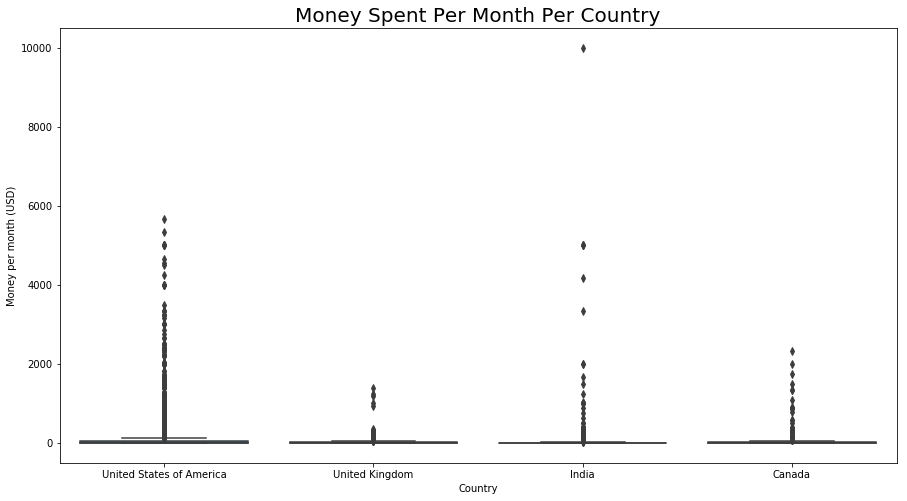

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(y = 'mth_budg', x = 'CountryLive', data = budg_df)
ax.set_title('Money Spent Per Month Per Country', fontsize = 20)
ax.set_ylabel('Money per month (USD)')
ax.set_xlabel('Country')


## Choosing the Two Best Markets
Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \\$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45)

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

* $59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
* We have almost twice as more potential customers in India than we have in Canada:
   

In [70]:
#Frequency table for the 'CountryLive' column
budg_df['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.852602
India                       11.868752
United Kingdom               7.152012
Canada                       6.126634
Name: CountryLive, dtype: float64

## Conclusion
While Canada has the higher mean budget per person, India has substantially more customers. So, it is difficult to determine which country to go for.

With that in mind let the consider the following options.

* Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

    * 60% for the US, 25% for India, 15% for Canada.
    * 50% for the US, 30% for India, 20% for Canada.
    * and other combinations...


* Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement based on how lucrative each country might be:

    * 70% for the US, and 30% for India.
    *65% for the US, and 35% for Canada; etc.


* We could also just put all our budget in the US.

At this point, we will just defer to the marketing team and let them use their domain expertise to decide the next steps. We will send our analysis to them and prepare for more discussion on this topic.


## Outlier Detection via Z-Scores
Another method of identifying outliers is using Z-scores, which rely on measures of centrality and spread such as means and standard deviations. Although it is more susceptible to changes than IQD metho, let's explore this method anyway for fun

In [74]:
# import zscore module
from scipy.stats import zscore

#group each market/country
country_group = budg_df.groupby("CountryLive")

# calculate zscore for each value for InvestPerMonth column with ddof = 1
# ddof = 1 for sample, use transform instead of apply to retain shape of output, otherwise error
budg_df["budg_zscore"] = country_group['mth_budg'].transform(lambda x: zscore(x, ddof=1))

In [75]:
budg_df[['mth_budg', 'CountryLive','budg_zscore']]

,mth_budg,CountryLive,budg_zscore
1,13.333333,United States of America,-0.257257
2,200.000000,United States of America,0.114077
6,0.000000,United Kingdom,-0.280537
15,0.000000,United States of America,-0.283781
16,16.666667,United States of America,-0.250626
18,35.714286,United States of America,-0.212735
19,17.857143,United States of America,-0.248258
21,100.000000,United States of America,-0.084852
22,285.714286,United Kingdom,1.479743
23,100.000000,United States of America,-0.084852


Now we have to choose a threshold. Let's choose the usual 3 SD heuristic and remove all observations that fall outside of that threshold

In [78]:
usa = budg_df[(budg_df['budg_zscore'] <=3) &(budg_df['CountryLive'] == 'United States of America')]
india = budg_df[(budg_df['budg_zscore'] <=3) & (budg_df['CountryLive'] == 'India')]
canada = budg_df[(budg_df['budg_zscore'] <=3) & (budg_df['CountryLive'] == 'Canada')]
uk = budg_df[(budg_df['budg_zscore'] <=3) & (budg_df['CountryLive'] == 'United Kingdom')]
within_3sd_df = pd.concat([usa, india, canada, uk])
within_3sd_df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JRI,n_interests,webmod,mth_budg,budg_zscore
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[full stack web developer],1,webmod,13.333333,-0.257257
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"[front end web developer, back end web develop...",5,webmod,200.000000,0.114077
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[full stack web developer],1,webmod,0.000000,-0.283781
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,[full stack web developer],1,webmod,16.666667,-0.250626
18,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"[full stack web developer, front end web devel...",4,webmod,35.714286,-0.212735


In [79]:
#check the descriptive data of our new subset
subset_desc = within_3sd_df.groupby("CountryLive")['mth_budg'].describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99])
subset_desc

,count,mean,std,min,25%,50%,75%,95%,99%,max
CountryLive,,,,,,,,,,
Canada,232.0,46.934471,139.956968,0.0,0.0,0.0,20.000000,287.777778,837.545455,900.000000
India,457.0,65.758763,233.452738,0.0,0.0,0.0,12.500000,340.666667,1110.000000,2000.000000
United Kingdom,274.0,25.245838,57.025994,0.0,0.0,0.0,20.000000,166.666667,291.648352,357.142857
United States of America,2847.0,74.338801,204.871390,0.0,0.0,2.5,35.714286,450.000000,1146.714286,1650.000000


Text(0.5, 0, 'Country')

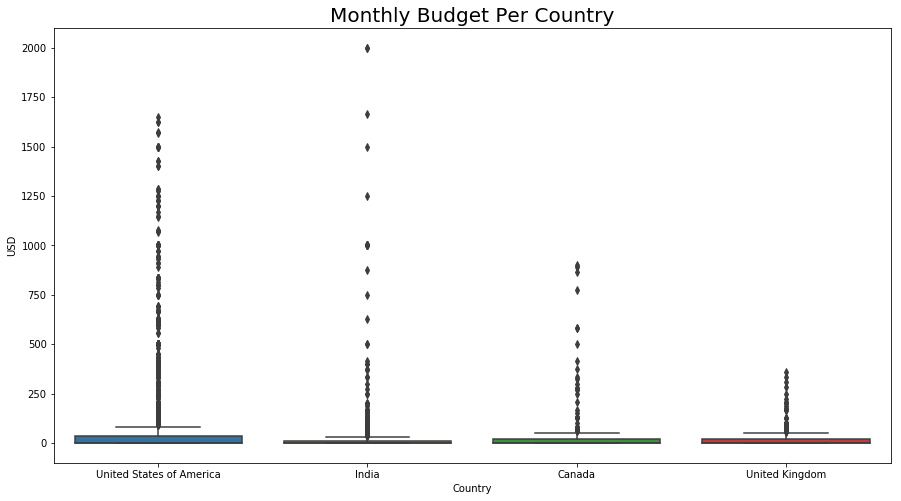

In [81]:
#boxplot for subset
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(y = 'mth_budg', x = 'CountryLive', data = within_3sd_df)
ax.set_title('Monthly Budget Per Country', fontsize = 20)
ax.set_ylabel('USD')
ax.set_xlabel('Country')
